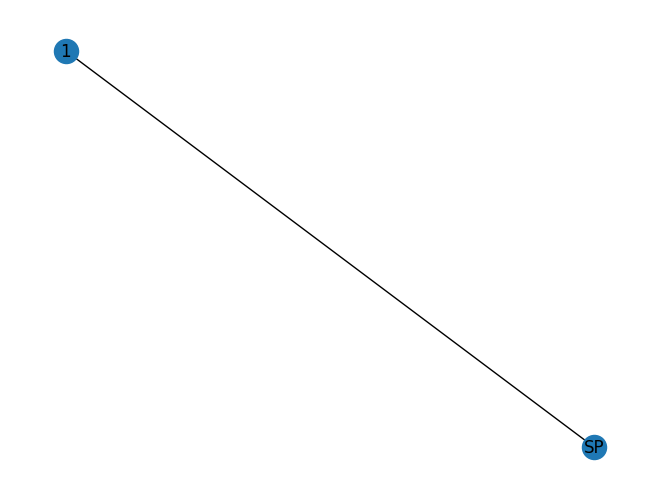

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node(1)
G.add_node("SP")
G.add_edge(1, "SP")
nx.draw(G, with_labels=True)
plt.show()

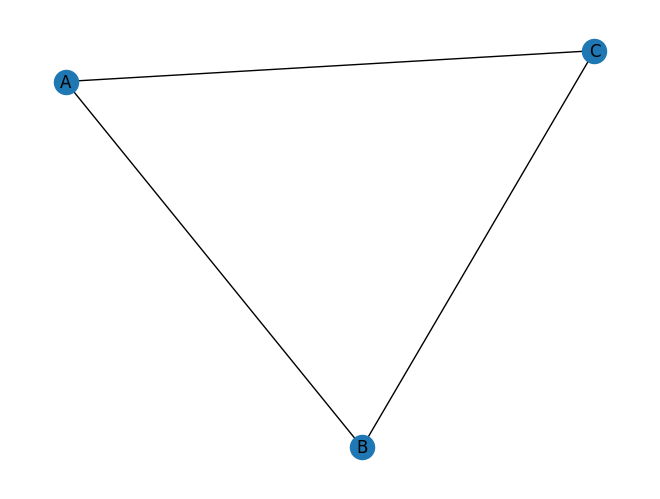

In [4]:
import pandas as pd

# Suponha um DataFrame de arestas
df = pd.DataFrame({'origem': ['A', 'B', 'A'], 'destino': ['B', 'C','C']})
G = nx.from_pandas_edgelist(df, source='origem', target='destino')
nx.draw(G, with_labels=True)
plt.show()


In [3]:
import pandas as pd
from pyvis.network import Network

# Exemplo de dados (substitua pelos seus DataFrames reais)
df_distancias = pd.DataFrame({
    'origem': ['RE', 'RE', 'SA', 'SA'],
    'destino': ['C1', 'C2', 'C3', 'C1'],
    'distancia_km': [150, 250, 350, 300],
    'duracao_h': [2, 3, 5, 4]
})

df_pib = pd.DataFrame({
    'cod_completo': ['RE', 'SA', 'C1', 'C2', 'C3'],
    'nome_cidade': ['Recife', 'Salvador', 'Cidade1', 'Cidade2', 'Cidade3'],
    'pib': [70000, 65000, 30000, 40000, 25000]
})

# Criar o grafo pyvis
net = Network(height='600px', width='800px', bgcolor='#222222', font_color='white')

# Adicionar os nós (cidades) no grafo
for _, row in df_pib.iterrows():
    cor = 'red' if row['nome_cidade'] in ['Recife', 'Salvador'] else 'blue'
    tamanho = 20 if row['nome_cidade'] in ['Recife', 'Salvador'] else 10
    titulo = f"{row['nome_cidade']}<br>PIB: {row['pib']}"
    net.add_node(row['cod_completo'], label=row['nome_cidade'], title=titulo, color=cor, size=tamanho)

# Adicionar as arestas usando as distancias
for _, row in df_distancias.iterrows():
    net.add_edge(row['origem'], row['destino'], label=f"{row['distancia_km']} km")

# Gerar arquivo HTML interativo para visualizar o grafo
net.save_graph('grafo_cidades.html')